In [1]:
from matplotlib import font_manager
font_path = '/home/t/tomoyuki-mano1/fonts/arial.ttf'
font_manager.fontManager.addfont(font_path)

### Prepare space in /flash

In [2]:
import os, subprocess

In [3]:
cwd = os.path.basename(os.getcwd())
tmpdir = os.path.join("/flash/ReiterU/tmp/", cwd, "violin")
if not os.path.exists(tmpdir):
    os.makedirs(tmpdir)

### Main

In [4]:
import pandas as pd
import numpy as np
import os, h5py
from probemapper.plot import merge_data_oct
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
lut = pd.read_csv("/bucket/ReiterU/DBS/atlas/O_Laqueus_v0.2/region_LUT.csv")
lut["region_name2"] = ["VL", "Others", "sFL", "iFL", "Buc", "Subfr", "aBL", "dBL", "Subv", "Prec"]
display(lut)

,ID,region_name,region_color,region_name2
0,1,Vertical Lobe,"128,174,128",VL
1,3,Others,"216,100,79",Others
2,4,Median superior frontal lobe + Lateral superio...,"216,100,79",sFL
3,5,Median inferior frontal lobe + Lateral inferio...,"255,147,114",iFL
4,6,Superior buccal lobe\n+ Posterior buccal lobe,"244,128,26",Buc
5,7,Subfrontal lobe,"251,202,0",Subfr
6,8,Anterior basal lobe,"89,114,255",aBL
7,9,Anterior dorsal basal lobe + Posterior dorsal ...,"82,145,163",dBL
8,11,Subvertical Lobe,"24,151,54",Subv
9,12,Precomissural,"255,170,255",Prec


In [6]:
data = [
    {
        "name": "L-J30",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220526_P189_laqueus_DiI_L-J30/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 0,
    },
    {
        "name": "L-F11",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220526_P190_laqueus_DiI_L-F11/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 1,
    },
    {
        "name": "L-M4",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220321_P177_laqueus_DiI_3-8_CUBIC/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 2,
    },
    {
        "name": "L-M13",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220529_P191_laqueus_DiI_LM13/analysis/indexing/channel_LUT.csv",
        "offset": 10,
        "hdf5_column": 3,
    },
    {
        "name": "L-M27",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220517_P185_laqueus_DiI_L-M27/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 4,
    },
    {
        "name": "L-A1",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220613_P200_laqueus_DiI_L-A1/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 5,
    },
    {
        "name": "L-A2",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220518_P186_laqueus_DiI_L-A2/analysis/indexing/channel_LUT.csv",
        "offset": 10,
        "hdf5_column": 6,
    },
    {
        "name": "L-A11",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220614_P201_laqueus_DiI_L-A11/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 7,
    },
    {
        "name": "L-A29",
        "channel_lut": "/bucket/ReiterU/DBS/data/20220615_P202_laqueus_DiI_L-A29/analysis/indexing/channel_LUT.csv",
        "offset": 0,
        "hdf5_column": 8,
    }
]

In [9]:
hdf_info = [
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/asBoutOverChans.h5",
        "key": "maxL",
        "name": "AS_low",
        "description": "Envelop intensity (a.u.) in 0.1-10 Hz band during AS"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/asBoutOverChans.h5",
        "key": "maxH",
        "name": "AS_high",
        "description": "Envelop intensity (a.u.) in 20-40 Hz band during AS"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/wakeBoutOverChans.h5",
        "key": "maxL",
        "name": "wake_low",
        "description": "Envelop intensity (a.u.) in 0.1-10 Hz band during wake"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/wakeBoutOverChans.h5",
        "key": "maxH",
        "name": "wake_high",
        "description": "Envelop intensity (a.u.) in 20-40 Hz band during wake"
    },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/spindleRate.h5",
        "key": "smoothedRate",
        "name": "spindle_rate",
        "description": "Spindle rate (events per min) during QS"
    },
#     {
#         "path": "/bucket/ReiterU/octopus/electrophysiology/bceBoutOverChans.h5",
#         "key": "maxBCE",
#         "name": "BCE-LFP_xcr",
#         "description": "Correlation between BCE and LFP during QS"
#     },
    {
        "path": "/bucket/ReiterU/octopus/electrophysiology/vleRate.h5",
        "key": "smoothedRate",
        "name": "VLE_rate",
        "description": "VLE rate"
    },
]

In [10]:
probes = merge_data_oct(data, hdf_info, lut)

In [11]:
display(probes)

,channel,X,Y,Z,X_org,Y_org,Z_org,Region,Region_name,Region_color,AS_low,AS_high,wake_low,wake_high,spindle_rate,VLE_rate,probe
0,0,188.530,182.238,151.016,1787.73,2235.010,1369.73,7,Subfr,"[251, 202, 0]",56.201382,11.864695,70.132145,8.700345,0.002035,0.009922,L-J30
1,1,189.106,182.020,151.850,1790.54,2227.030,1374.33,6,Buc,"[244, 128, 26]",60.292831,12.237704,104.501735,9.159114,0.002358,0.009922,L-J30
2,2,189.691,181.804,152.705,1793.35,2219.050,1378.92,6,Buc,"[244, 128, 26]",63.969708,12.302763,126.513071,9.328845,0.002367,0.011709,L-J30
3,3,190.277,181.584,153.564,1796.16,2211.070,1383.52,6,Buc,"[244, 128, 26]",65.500991,12.298809,136.413883,9.623294,0.002367,0.011709,L-J30
4,4,190.866,181.371,154.449,1798.97,2203.080,1388.11,6,Buc,"[244, 128, 26]",63.298585,12.297226,166.032590,9.671849,0.002619,0.014387,L-J30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,182,242.226,151.987,424.261,1992.10,478.734,2870.82,1,VL,"[128, 174, 128]",113.861077,7.383735,85.713062,8.731903,0.001230,0.006667,L-A29
1964,183,242.312,151.292,425.283,1991.75,469.050,2873.30,1,VL,"[128, 174, 128]",95.294351,7.206315,88.089958,8.438548,0.001230,0.005833,L-A29
1965,184,242.384,150.592,426.303,1991.21,459.367,2875.72,1,VL,"[128, 174, 128]",93.595044,7.263342,103.297760,8.792900,0.001230,0.005833,L-A29
1966,185,242.443,149.871,427.341,1990.49,449.684,2878.09,1,VL,"[128, 174, 128]",85.833855,7.204279,87.088209,7.928503,0.001230,0.003333,L-A29


In [12]:
# remove aBL channels, since the sample size is too low
probes.drop(probes[probes["Region_name"]=="aBL"].index, inplace=True)

### Plot!

In [13]:
mpl.rcParams.update({
    'font.size': 21,
    'font.family': 'sans-serif',
    'font.sans-serif': "Arial",
    'pdf.fonttype': 42,
    'ps.fonttype': 42})

palette = {}
for (_, row) in lut.iterrows():
    i = row["region_name2"]
    color = [int(x) for x in row["region_color"].split(',')]
    color = tuple([v/255 for v in color])
    palette[i] = color

palette2 = ["#7F7F7F"]

order = ["VL", "Subv", "sFL", "iFL", "Subfr", "Buc", "dBL"]

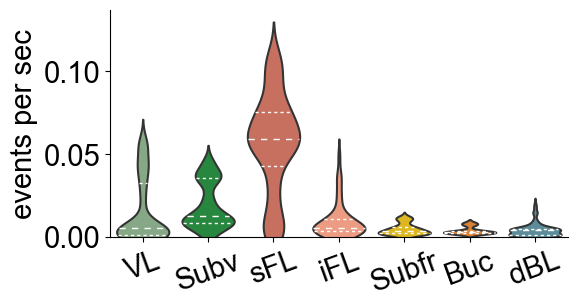

In [14]:
fig, ax = plt.subplots(figsize=(150/25.4,75/25.4))
violin = sns.violinplot(x="Region_name", y="spindle_rate", data=probes, ax=ax, scale="width",
                        inner="quartile", order=order, palette=palette)

for p in violin.lines:
    p.set_linewidth(1.0)
    p.set_color('white')

#ax.set_title("20-40 Hz")
ax.set_ylabel("events per sec")
ax.set_xlabel("")
ax.set_ylim(bottom=0)
ax.tick_params(axis='x', rotation=20)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig(os.path.join(tmpdir, "violin_spindlerate_colorful.pdf"), bbox_inches='tight')
plt.show()

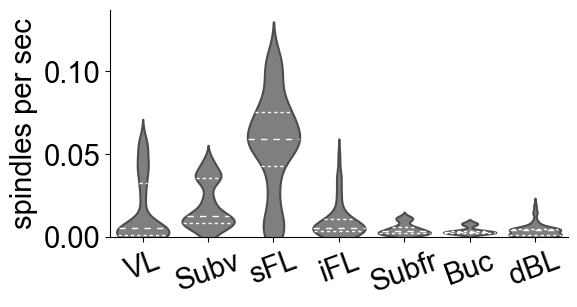

In [15]:
fig, ax = plt.subplots(figsize=(150/25.4,75/25.4))
violin = sns.violinplot(x="Region_name", y="spindle_rate", data=probes, ax=ax, scale="width",
                        inner="quartile", order=order, palette=palette2)

for p in violin.lines:
    p.set_linewidth(1.0)
    p.set_color('white')

#ax.set_title("20-40 Hz")
ax.set_ylabel("spindles per sec")
ax.set_xlabel("")
ax.set_ylim(bottom=0)
ax.tick_params(axis='x', rotation=20)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig(os.path.join(tmpdir, "violin_spindlerate_gray.pdf"), bbox_inches='tight')
plt.show()

### Divide anterior and posterior VL and Subv

In [16]:
import nrrd
from scipy import ndimage as ndi
from scipy.spatial.transform import Rotation as R

In [17]:
annotation, _ = nrrd.read("/bucket/ReiterU/DBS/atlas/O_Laqueus_v0.2/Slicer_3D/Segmentation.seg.nrrd")

In [18]:
annotation = np.swapaxes(annotation, 0, 2)

# rotation
annotation = ndi.rotate(annotation, 225, axes=(0,1), reshape=False, order=0)
annotation = ndi.rotate(annotation, 5, axes=(0,2), reshape=False, order=0)

print(annotation.shape)

(480, 570, 450)


In [19]:
vl = annotation == 1
subvl = annotation == 11

AP center of VL

In [20]:
xmin = np.where(vl > 0)[1].min()
xmax = np.where(vl > 0)[1].max()
print(xmin, xmax)
print("X center:", (xmin+xmax)/2.0)

105 365
X center: 235.0


AP center of subVL

In [21]:
xmin = np.where(subvl > 0)[1].min()
xmax = np.where(subvl > 0)[1].max()
print(xmin, xmax)
print("X center:", (xmin+xmax)/2.0)

130 364
X center: 247.0


In [22]:
xyz = probes[["X", "Y", "Z"]].to_numpy()

# rotation along x axis
r1 = R.from_euler('x', -225, degrees=True)
xyz -= np.array([0, annotation.shape[1]/2, annotation.shape[0]/2])
xyz = r1.apply(xyz)
xyz += np.array([0, annotation.shape[1]/2, annotation.shape[0]/2])
# rotation along yaxis
r2 = R.from_euler('y', 5, degrees=True)
xyz -= np.array([annotation.shape[2]/2, 0, annotation.shape[0]/2])
xyz = r2.apply(xyz)
xyz += np.array([annotation.shape[2]/2, 0, annotation.shape[0]/2])

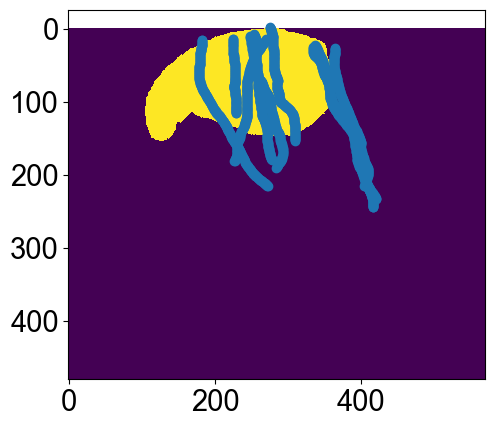

In [23]:
plt.imshow(vl.max(axis=2), interpolation="nearest")
plt.plot(xyz[:,1], xyz[:,2], "o")

In [24]:
probes["X_transf"] = xyz[:,0]
probes["Y_transf"] = xyz[:,1]
probes["Z_transf"] = xyz[:,2]

In [25]:
# New table

df1 = probes[(probes["Y_transf"] >= 235) & (probes["Region_name"] == "VL")]
df2 = probes[(probes["Y_transf"] >= 247) & (probes["Region_name"] == "Subv")]
df1["label"] = "anterior"
df2["label"] = "anterior"

df3 = probes[(probes["Y_transf"] < 235) & (probes["Region_name"] == "VL")]
df4 = probes[(probes["Y_transf"] < 247) & (probes["Region_name"] == "Subv")]
df3["label"] = "posterior"
df4["label"] = "posterior"

df = pd.concat([df1, df2, df3, df4])
display(df)

/home/t/tomoyuki-mano1/projects/probemapper/.env2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/t/tomoyuki-mano1/projects/probemapper/.env2/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/t/tomoyuki-mano1/projects/probemapper/.env2/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,channel,X,Y,Z,X_org,Y_org,Z_org,Region,Region_name,Region_color,...,AS_high,wake_low,wake_high,spindle_rate,VLE_rate,probe,X_transf,Y_transf,Z_transf,label
225,225,227.717,101.875,335.967,1957.75,502.749,2726.66,1,VL,"[128, 174, 128]",...,7.697058,74.623780,7.013755,0.000353,0.003578,L-J30,210.506663,346.630013,43.166320,anterior
226,226,227.917,101.579,336.687,1959.46,495.595,2733.04,1,VL,"[128, 174, 128]",...,7.187619,68.436472,6.739931,0.000343,0.003162,L-J30,210.643287,346.330200,42.433202,anterior
227,227,228.107,101.302,337.425,1961.10,488.474,2739.51,1,VL,"[128, 174, 128]",...,6.972017,65.862888,6.648753,0.000343,0.000000,L-J30,210.770012,346.004223,41.701661,anterior
228,228,228.283,101.040,338.182,1962.66,481.391,2746.08,1,VL,"[128, 174, 128]",...,6.705917,54.174934,6.556219,0.000253,0.000000,L-J30,210.882542,345.654205,40.968521,anterior
229,229,228.453,100.795,338.957,1964.14,474.346,2752.74,1,VL,"[128, 174, 128]",...,6.676398,45.222617,6.508913,0.000250,0.000000,L-J30,210.989035,345.279439,40.235200,anterior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,113,250.516,203.583,379.970,1510.00,1986.270,3030.09,11,Subv,"[24, 151, 54]",...,19.127295,77.212290,10.189040,0.007652,0.029057,L-A2,236.775174,243.596777,81.827583,posterior
1484,114,250.371,203.224,380.379,1507.47,1984.970,3039.38,11,Subv,"[24, 151, 54]",...,18.321281,74.785279,10.004308,0.007576,0.029057,L-A2,236.583395,243.561421,81.299229,posterior
1485,115,250.215,202.848,380.791,1504.93,1983.640,3048.68,11,Subv,"[24, 151, 54]",...,18.610901,74.476063,10.192099,0.007576,0.029057,L-A2,236.379425,243.535965,80.757746,posterior
1486,116,250.057,202.409,381.243,1502.38,1982.280,3057.97,11,Subv,"[24, 151, 54]",...,18.545832,75.451047,10.219037,0.006288,0.029114,L-A2,236.167116,243.526773,80.143882,posterior


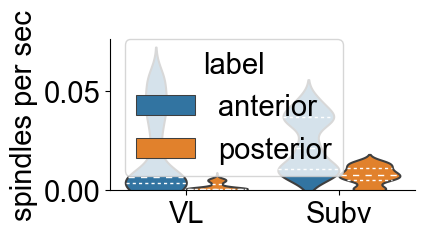

In [26]:
fig, ax = plt.subplots(figsize=(100/25.4, 50/25.4))
violin = sns.violinplot(x="Region_name", y="spindle_rate", data=df, hue="label", ax=ax, scale="width",
                        inner="quartile",)

for p in violin.lines:
    p.set_linewidth(1.0)
    p.set_color('white')

#ax.set_title("20-40 Hz")
ax.set_ylabel("spindles per sec")
ax.set_xlabel("")
# for i in range(len(order)):
#     ax.get_xticklabels()[i].set_color(p[i])
ax.set_ylim(bottom=0)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig(os.path.join(tmpdir, "violin_spindlerate_AP.pdf"), bbox_inches='tight')
plt.show()

### Save results in /bucket

In [31]:
resultdir = "/bucket/ReiterU/DBS/analysis/221020_octopus_spindle_figures/"
if not os.path.exists(resultdir):
    subprocess.run(["ssh", "deigo", "mkdir", resultdir])

In [32]:
subprocess.run(["scp", "-r", tmpdir, f"deigo:{resultdir}"])

CompletedProcess(args=['scp', '-r', '/flash/ReiterU/tmp/221021_octopus_spindle_figures/violin', 'deigo:/bucket/ReiterU/DBS/analysis/221020_octopus_spindle_figures/'], returncode=0)